In [15]:
# Preprocessing

In [16]:
'''Understanding the Parameters:
ρ (rho) - Fractional Order Parameter

This controls how much enhancement is applied.

A higher rho results in less aggressive enhancement, while a lower rho applies stronger enhancement to finer details.

It modifies the way pixel values are adjusted, making features stand out more or less.

k (kappa) - Scaling Parameter

This adjusts the balance between smoothing and intensity enhancement.

A higher k value increases smoothing, reducing noise while keeping important details.

A lower k value leads to sharper intensity changes, making details more pronounced but potentially amplifying noise.'''

'Understanding the Parameters:\nρ (rho) - Fractional Order Parameter\n\nThis controls how much enhancement is applied.\n\nA higher rho results in less aggressive enhancement, while a lower rho applies stronger enhancement to finer details.\n\nIt modifies the way pixel values are adjusted, making features stand out more or less.\n\nk (kappa) - Scaling Parameter\n\nThis adjusts the balance between smoothing and intensity enhancement.\n\nA higher k value increases smoothing, reducing noise while keeping important details.\n\nA lower k value leads to sharper intensity changes, making details more pronounced but potentially amplifying noise.'

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

def k_cfdo_enhancement(image, rho, k):
    """
    Enhance an image using the K-CFDO algorithm.
    
    Parameters:
    -----------
    image : numpy.ndarray
        Input image (grayscale)
    rho : float
        rho parameter of the algorithm
    k : float
        k parameter of the algorithm
        
    Returns:
    --------
    numpy.ndarray
        Enhanced image
    """
    # Make sure image is in float format
    img = image.astype(np.float64)
    
    # Get image dimensions
    n, m = img.shape
    
    # Normalize the image to [0, 1] range if needed
    if img.max() > 1.0:
        img = img / 255.0
    
    # Create the output image
    enhanced_img = np.zeros_like(img)
    
    # Step 3-5: Determine pixel probability and apply the enhancement equation
    for i in range(n):
        for j in range(m):
            # Step 3: Get pixel probability value (r)
            r = img[i, j]
            
            # Step 4: Determine the proposed K-CFDO using the equation
            # r^((1-rho)/k) * E_k^((1,1-rho)/k)(r)
            # Note: For simplicity, we're assuming E_k^((1,1-rho)/k)(r) part is approximated with gamma function
            
            # Step 5: Calculate the enhanced image
            numerator = r ** ((1 - rho) / k)
            denominator = special.gamma(2 - rho / k)
            
            enhanced_img[i, j] = img[i, j] * (numerator / denominator)
    
    # Normalize the output to ensure it's in valid range
    enhanced_img = (enhanced_img - enhanced_img.min()) / (enhanced_img.max() - enhanced_img.min())
    
    return enhanced_img

# Example usage
def load_and_enhance_image(image_path, rho=0.5, k=1.5):
    """
    Load an image, apply the K-CFDO enhancement, and show the results.
    
    Parameters:
    -----------
    image_path : str
        Path to the image file
    rho : float
        rho parameter for the enhancement
    k : float
        k parameter for the enhancement
    """
    # Load the image
    img = plt.imread(image_path)
    
    # Convert to grayscale if needed
    if len(img.shape) > 2:
        img = np.mean(img, axis=2)
    
    # Apply enhancement
    enhanced = k_cfdo_enhancement(img, rho, k)
    
    # Display results
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(enhanced, cmap='gray')
    plt.title(f'Enhanced Image (ρ={rho}, k={k})')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return enhanced


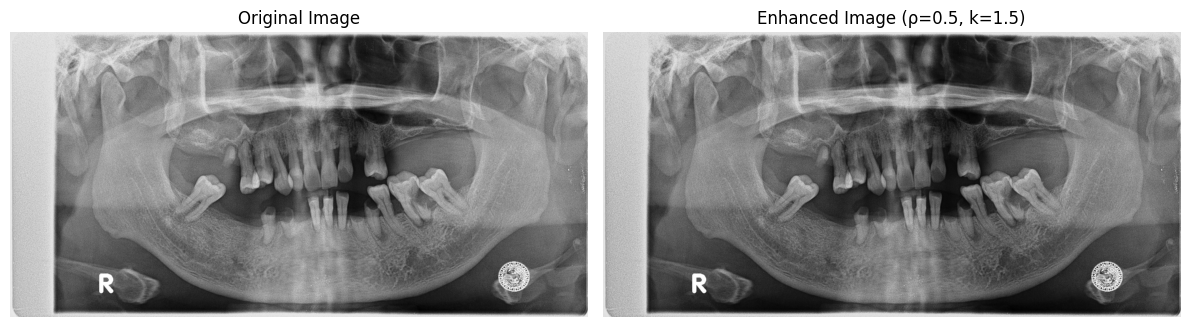

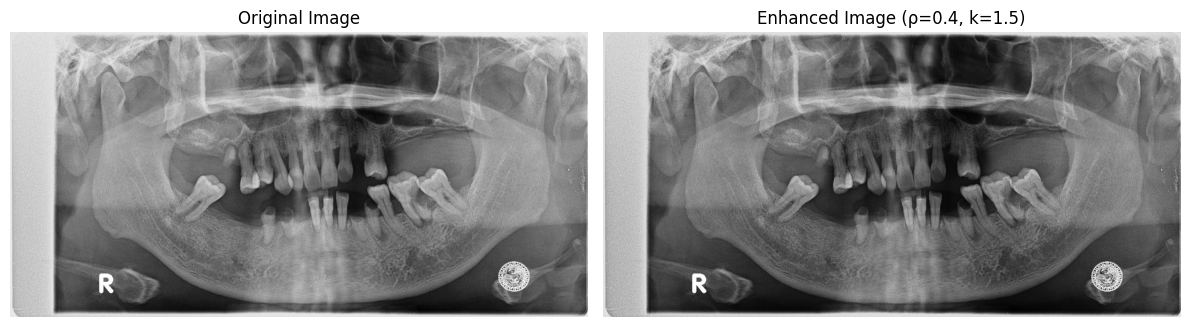

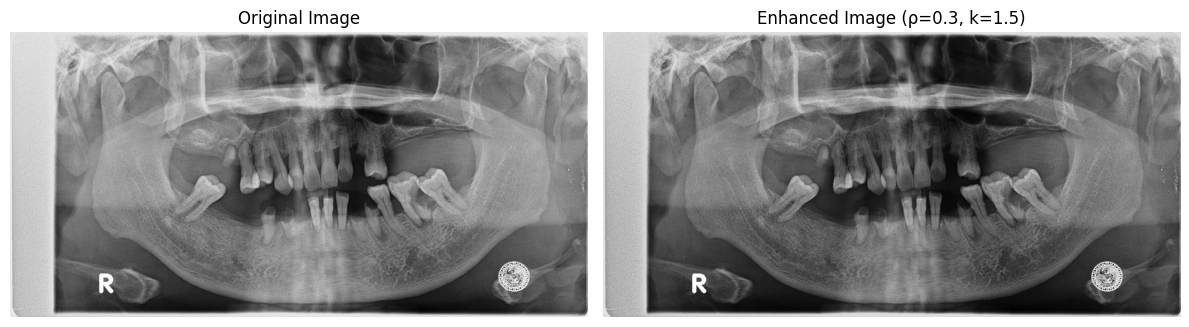

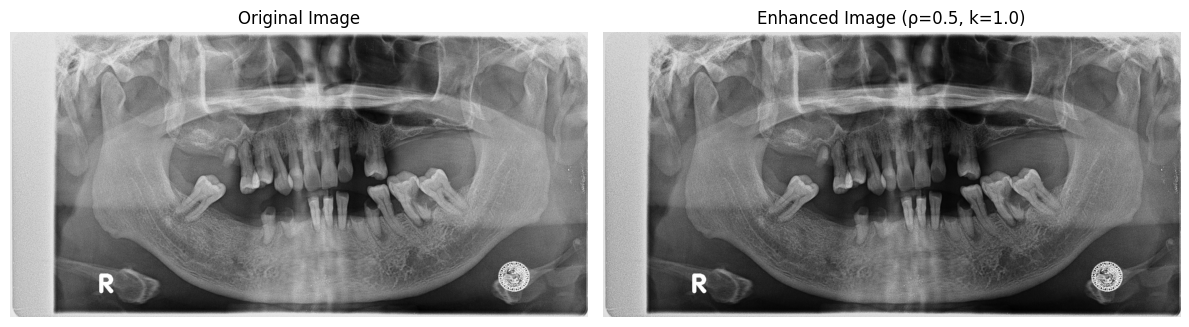

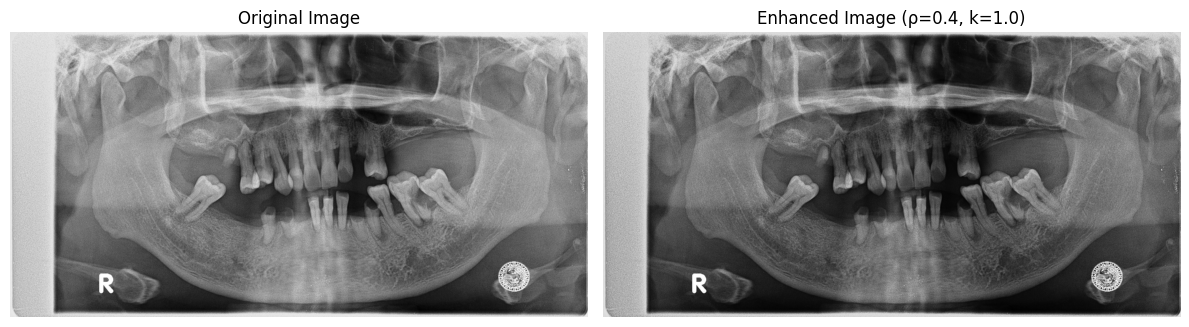

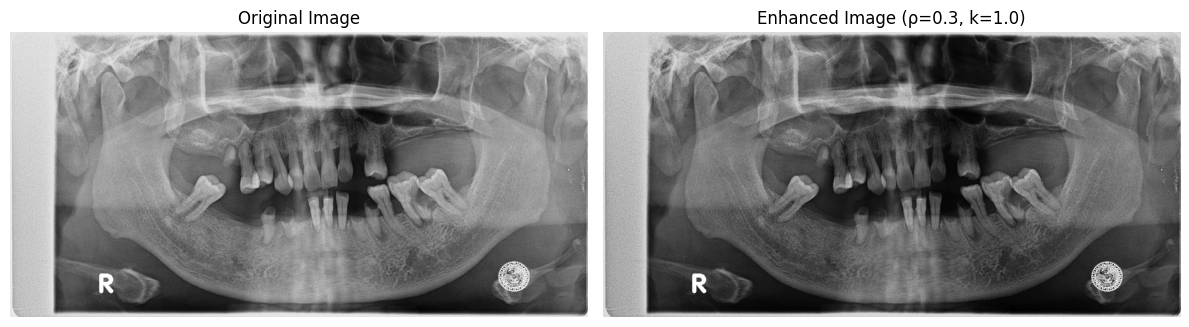

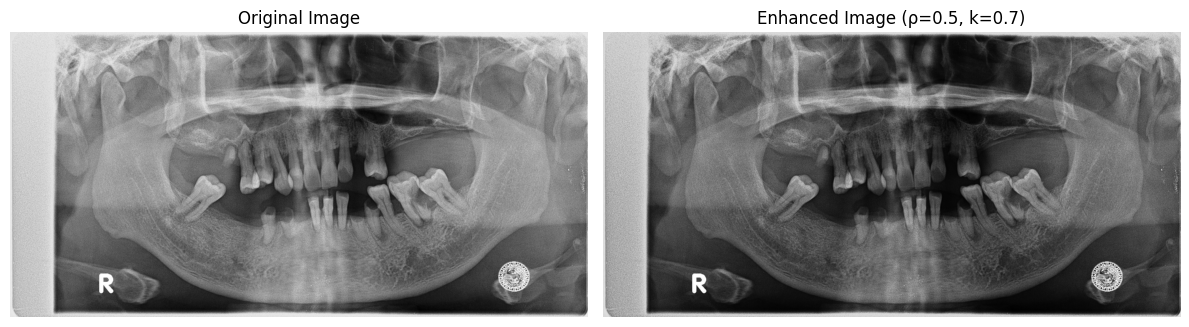

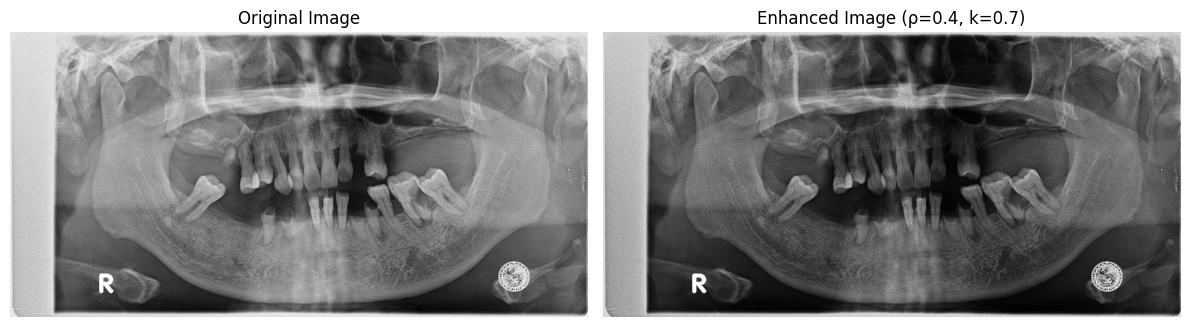

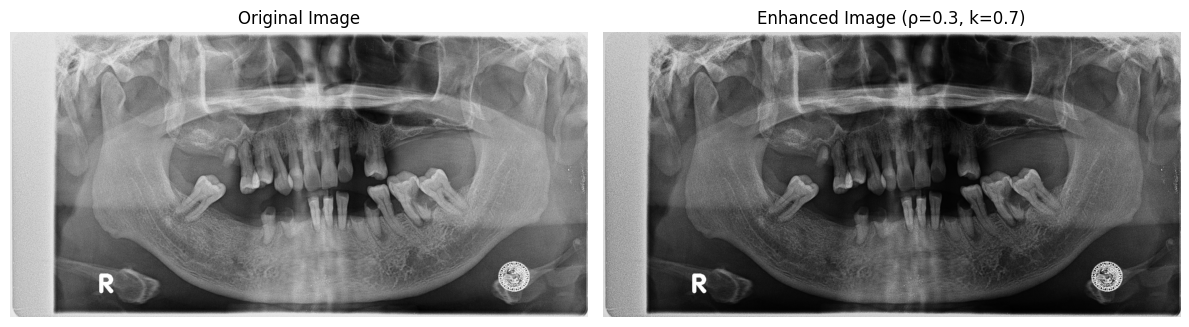

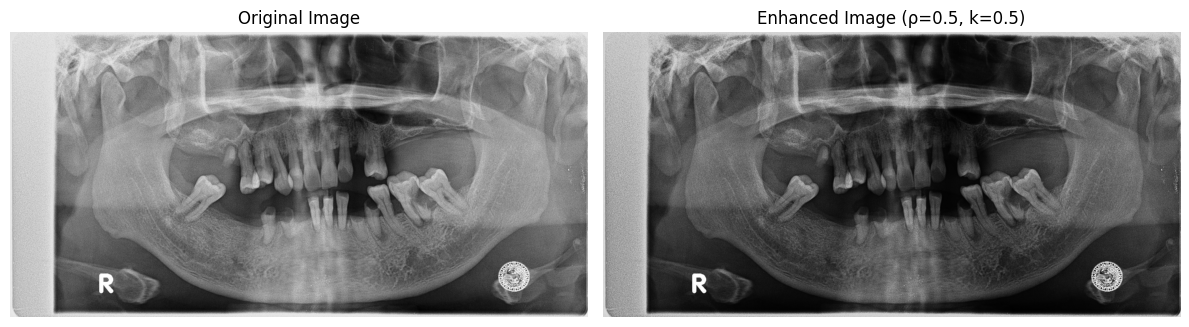

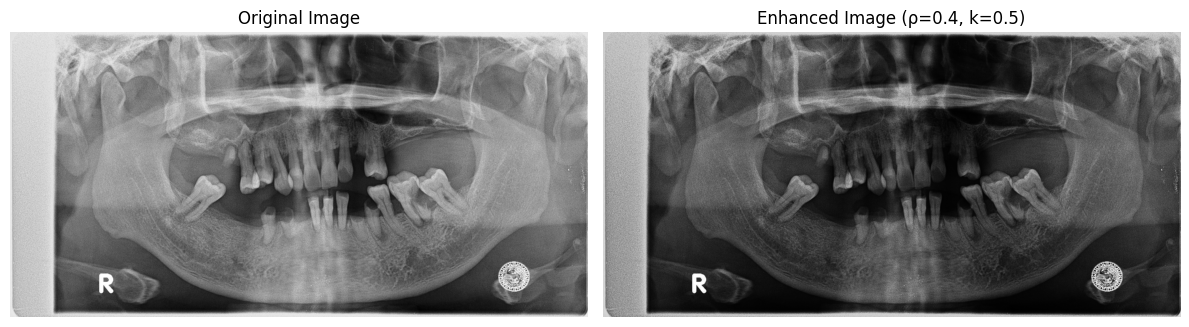

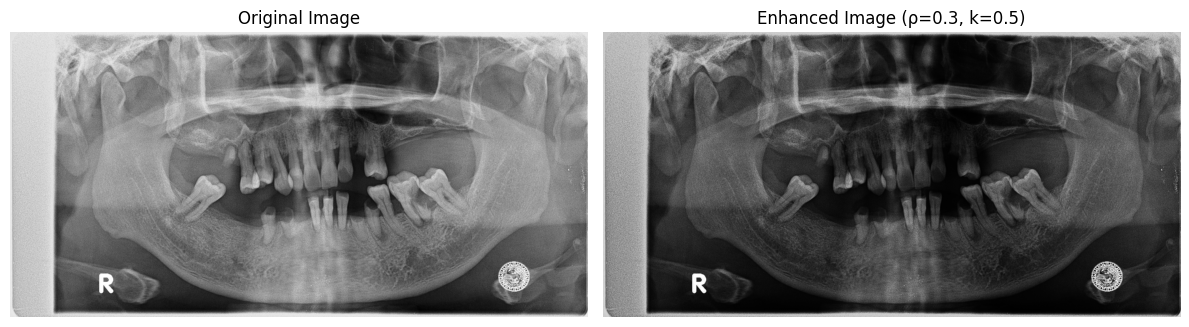

array([[0.77156541, 0.77156541, 0.77156541, ..., 0.78792528, 0.78792528,
        0.78792528],
       [0.77156541, 0.77156541, 0.77156541, ..., 0.78792528, 0.78792528,
        0.78792528],
       [0.77156541, 0.77156541, 0.77156541, ..., 0.78792528, 0.78792528,
        0.78792528],
       ...,
       [0.79617998, 0.79617998, 0.79617998, ..., 0.82124423, 0.82124423,
        0.82124423],
       [0.79617998, 0.79617998, 0.79617998, ..., 0.82124423, 0.82124423,
        0.82124423],
       [0.79617998, 0.79617998, 0.79617998, ..., 0.82124423, 0.82124423,
        0.82124423]])

In [14]:
load_and_enhance_image('trial.jpg', rho=0.5, k=1.5)
load_and_enhance_image('trial.jpg', rho=0.4, k=1.5)
load_and_enhance_image('trial.jpg', rho=0.3, k=1.5)
load_and_enhance_image('trial.jpg', rho=0.5, k=1.0)
load_and_enhance_image('trial.jpg', rho=0.4, k=1.0)
load_and_enhance_image('trial.jpg', rho=0.3, k=1.0)
load_and_enhance_image('trial.jpg', rho=0.5, k=0.7)
load_and_enhance_image('trial.jpg', rho=0.4, k=0.7)
load_and_enhance_image('trial.jpg', rho=0.3, k=0.7)
load_and_enhance_image('trial.jpg', rho=0.5, k=0.5)
load_and_enhance_image('trial.jpg', rho=0.4, k=0.5)
load_and_enhance_image('trial.jpg', rho=0.3, k=0.5)



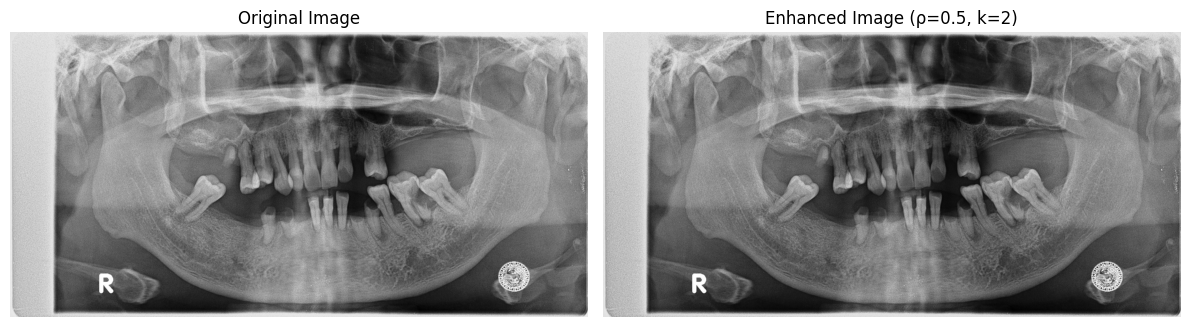

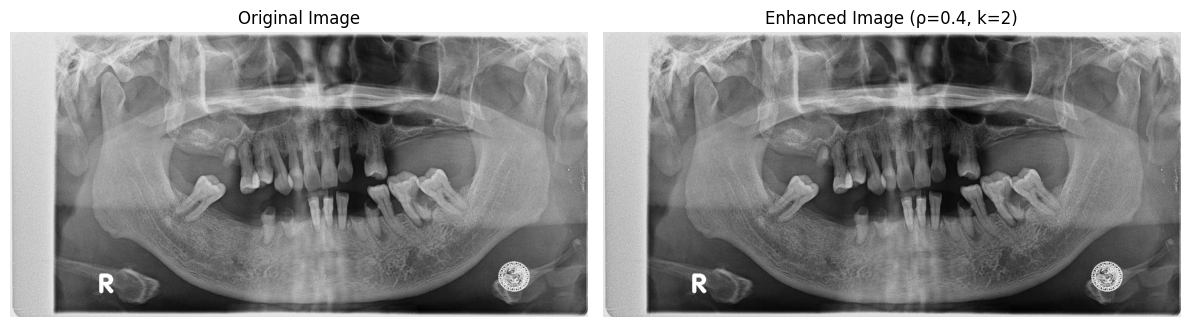

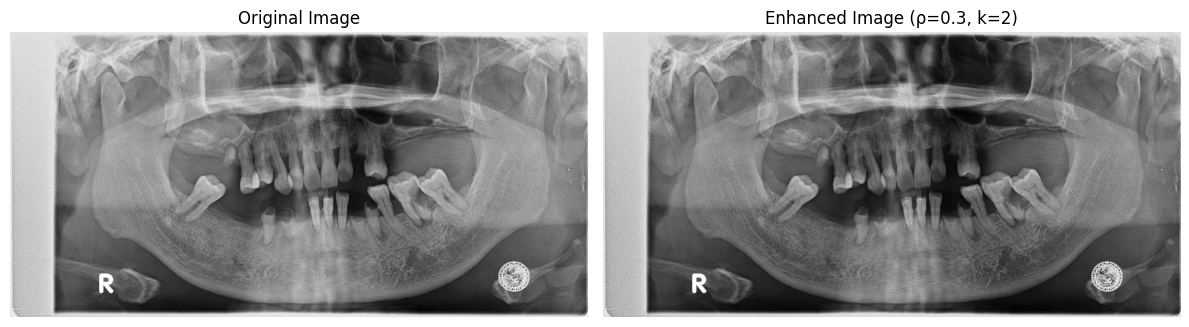

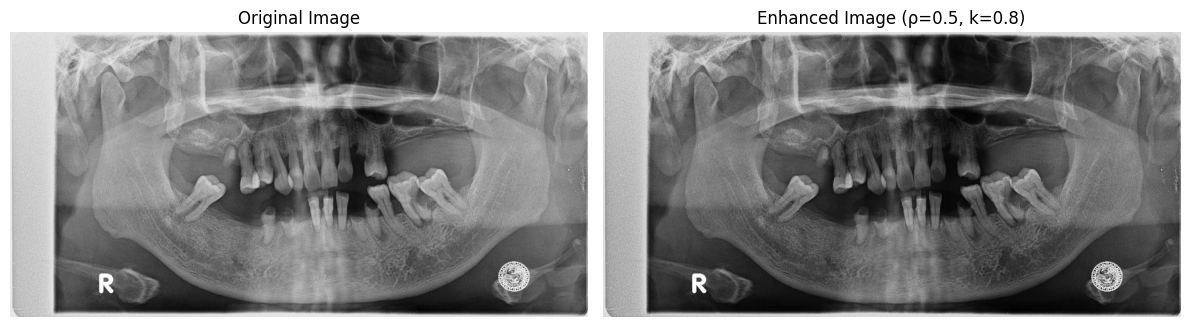

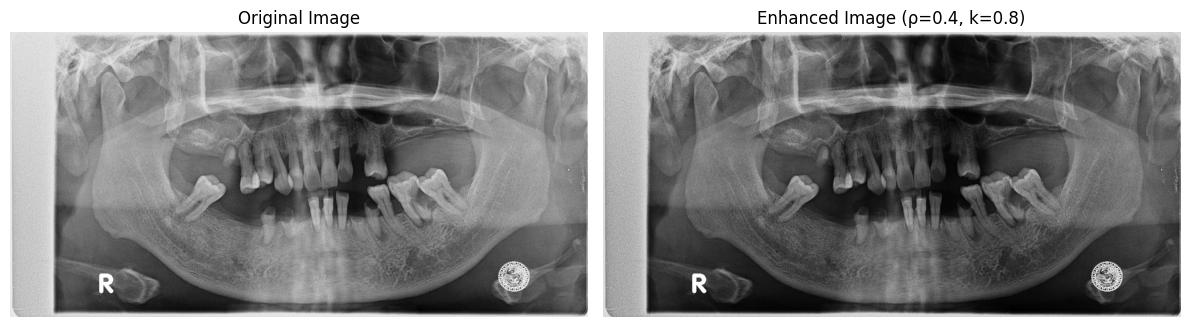

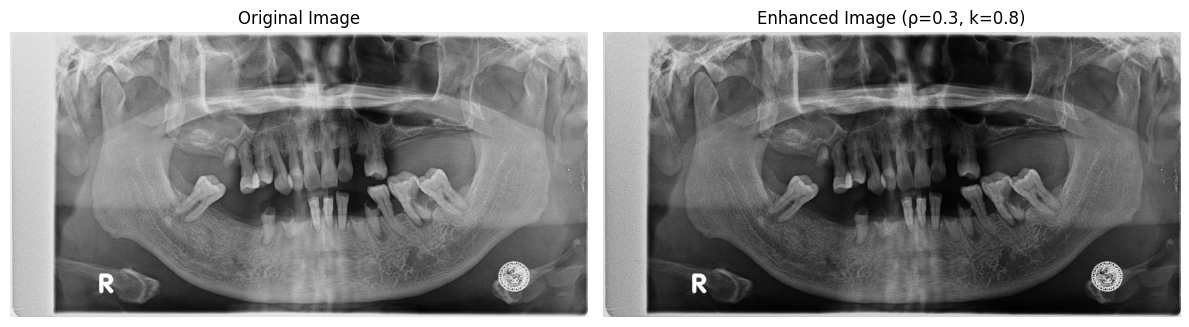

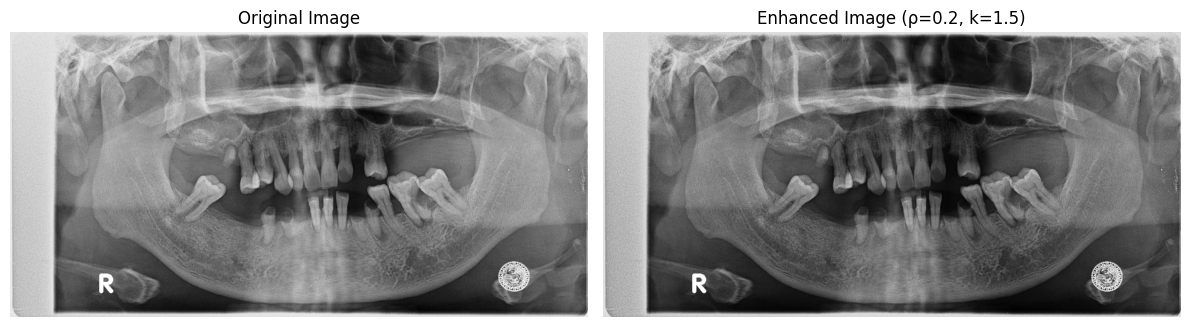

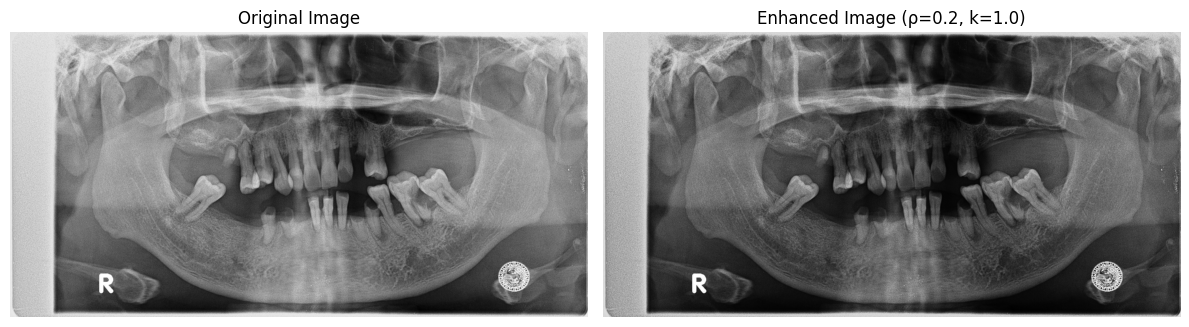

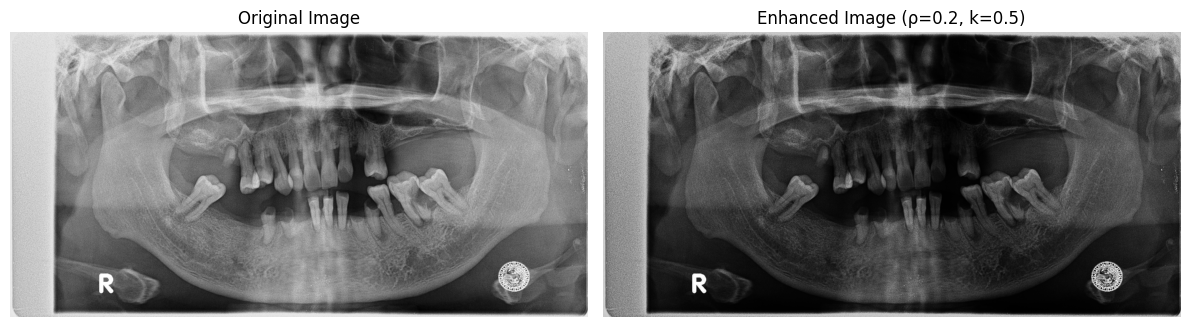

array([[0.75543393, 0.75543393, 0.75543393, ..., 0.77276852, 0.77276852,
        0.77276852],
       [0.75543393, 0.75543393, 0.75543393, ..., 0.77276852, 0.77276852,
        0.77276852],
       [0.75543393, 0.75543393, 0.75543393, ..., 0.77276852, 0.77276852,
        0.77276852],
       ...,
       [0.78152641, 0.78152641, 0.78152641, ..., 0.80816437, 0.80816437,
        0.80816437],
       [0.78152641, 0.78152641, 0.78152641, ..., 0.80816437, 0.80816437,
        0.80816437],
       [0.78152641, 0.78152641, 0.78152641, ..., 0.80816437, 0.80816437,
        0.80816437]])

In [17]:
load_and_enhance_image('trial.jpg', rho=0.5, k=2)
load_and_enhance_image('trial.jpg', rho=0.4, k=2)
load_and_enhance_image('trial.jpg', rho=0.3, k=2)
load_and_enhance_image('trial.jpg', rho=0.5, k=0.8)
load_and_enhance_image('trial.jpg', rho=0.4, k=0.8)
load_and_enhance_image('trial.jpg', rho=0.3, k=0.8)
load_and_enhance_image('trial.jpg', rho=0.2, k=1.5)
load_and_enhance_image('trial.jpg', rho=0.2, k=1.0)
load_and_enhance_image('trial.jpg', rho=0.2, k=0.5)

